<a href="https://colab.research.google.com/github/kanishkagargg/Superstore_sales_customer_segmentation/blob/main/Applied_Statistics_Project_Mid_Term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis

##Problem Statement


🎯 **Objective**:

My mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. The goal is to identify patterns, trends, and correlations that will help the store optimize its marketing efforts and increase offer acceptance rates.

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





### Task 1 - Basic CleanUp

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import kurtosis
import statistics
from dateutil.relativedelta import relativedelta
from datetime import date
from datetime import datetime
import scipy.stats as stats
from scipy.stats import expon
from scipy.stats import uniform
from scipy.stats import gamma
from scipy.stats import beta

In [ ]:
!pip install fitter
from fitter import Fitter

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.8 MB/s eta 0:00:00
  Created wheel for fitter: filename=fitter-1.6.0-py3-none-any.whl size=26058 sha256=8de68274dc1c5519b17e7e8c22505ad7725a91a403220771097f374f364a286c
  Stored in directory: /root/.cache/pip/wheels/26/f9/51/059fcaf0ba5aafd94463e31b343453c5cf165cea425f25c0f9
Successfully built fitter
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's depe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Superstore_Data = pd.read_csv('/content/drive/MyDrive/superstore_data.csv',encoding="ISO-8859-1")

In [ ]:
# Dataset First Look
Superstore_Data.head()

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3  11-05-2014        0        10  ...                0                 0   
4  08-04-2014        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0           218                  1                4                    4   
1            37                  1                7                    3   
2            30                  1                3                    2   
3             0                  1                1                    0   
4            34                  2                3                    1   

   NumStorePurchases  NumWebVisitsMonth  Response  Complain  
0                  6                  1         1         0  
1                  7                  5         1         0  
2                  5                  2         0         0  
3                  2                  7         0         0  
4                  2                  7         1         0  

[5 rows x 22 columns]

In [ ]:
# Number of rows and columns in dataset
Superstore_Data.shape

(2240, 22)

In [ ]:
# information about Null values and data type of different columns
Superstore_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Number of duplicate rows
len(Superstore_Data[Superstore_Data.duplicated()])

0

In [ ]:
# Number of null values for each of the column
Superstore_Data.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [ ]:
# Number of unique values for each of the column
for i in Superstore_Data.columns.tolist():
  print("No. of unique values in ",i,"is",Superstore_Data[i].nunique(),".")

No. of unique values in  Id is 2240 .
No. of unique values in  Year_Birth is 59 .
No. of unique values in  Education is 5 .
No. of unique values in  Marital_Status is 8 .
No. of unique values in  Income is 1974 .
No. of unique values in  Kidhome is 3 .
No. of unique values in  Teenhome is 3 .
No. of unique values in  Dt_Customer is 663 .
No. of unique values in  Recency is 100 .
No. of unique values in  MntWines is 776 .
No. of unique values in  MntFruits is 158 .
No. of unique values in  MntMeatProducts is 558 .
No. of unique values in  MntFishProducts is 182 .
No. of unique values in  MntSweetProducts is 177 .
No. of unique values in  MntGoldProds is 213 .
No. of unique values in  NumDealsPurchases is 15 .
No. of unique values in  NumWebPurchases is 15 .
No. of unique values in  NumCatalogPurchases is 14 .
No. of unique values in  NumStorePurchases is 14 .
No. of unique values in  NumWebVisitsMonth is 16 .
No. of unique values in  Response is 2 .
No. of unique values in  Complain is 

There are only 24 null values in Income and 0 duplicate rows. So we will fill those NA values with the median of income as later we will see that there are some outliers in income and we do not want to have an effect of that outlier in computation.

Also, some data types also needs to be changed. Like - Dt_Customer and Year_Birth needs to be chnaged to date format so that we can calculate customer age and customer-company age. ID needs to be converted into string. Kidhome, Complain, Response needs to be converted into categorical rather than integer. Also, I would like to convert Kidhome and Teenhome to categorical type as there are 3 unique values for each of them.

In [ ]:
# Replacing null values in income with mediam
Superstore_Data['Income'] = Superstore_Data['Income'].fillna(value= Superstore_Data['Income'].median())

In [ ]:
# Converting data type of the following to date and time format
Superstore_Data['Dt_Customer'] = pd.to_datetime(Superstore_Data['Dt_Customer'])
Superstore_Data['Year_Birth'] = pd.to_datetime(Superstore_Data['Year_Birth'], format='%Y')

In [ ]:
# Converting data type of the following to string/category
Superstore_Data['Id'] = Superstore_Data['Id'].astype(str)
Superstore_Data['Kidhome'] = Superstore_Data['Kidhome'].astype('category')
Superstore_Data['Teenhome'] = Superstore_Data['Teenhome'].astype('category')
Superstore_Data['Complain'] = Superstore_Data['Complain'].astype('category')
Superstore_Data['Response'] = Superstore_Data['Response'].astype('category')

In [ ]:
# Adding a column of 'Customer_Age' by calculating ages from Year_Birth

birth_date = list(Superstore_Data['Year_Birth'])
Ages = []
today = date.today()
for dates in birth_date:
  birth_date = dates
  age = relativedelta(today, birth_date)
  Ages.append(age.years)

Superstore_Data['Customer_Age'] = Ages
Superstore_Data.head()

Id Year_Birth   Education Marital_Status   Income Kidhome Teenhome  \
0   1826 1970-01-01  Graduation       Divorced  84835.0       0        0   
1      1 1961-01-01  Graduation         Single  57091.0       0        0   
2  10476 1958-01-01  Graduation        Married  67267.0       0        1   
3   1386 1967-01-01  Graduation       Together  32474.0       1        1   
4   5371 1989-01-01  Graduation         Single  21474.0       1        0   

  Dt_Customer  Recency  MntWines  ...  MntSweetProducts  MntGoldProds  \
0  2014-06-16        0       189  ...               189           218   
1  2014-06-15        0       464  ...                 0            37   
2  2014-05-13        0       134  ...                 2            30   
3  2014-11-05        0        10  ...                 0             0   
4  2014-08-04        0         6  ...                 0            34   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                4                    4                  6   
1                  1                7                    3                  7   
2                  1                3                    2                  5   
3                  1                1                    0                  2   
4                  2                3                    1                  2   

   NumWebVisitsMonth  Response  Complain  Customer_Age  
0                  1         1         0            53  
1                  5         1         0            62  
2                  2         0         0            65  
3                  7         0         0            56  
4                  7         1         0            34  

[5 rows x 23 columns]

In [ ]:
# Adding a column of 'Customer_company_age' by calculating ages from Dt_Customer

Dt_date = list(Superstore_Data['Dt_Customer'])
Customer_company_age = []
today = date.today()
for dates in Dt_date:
  Dt_date = dates
  age = relativedelta(today, Dt_date)
  Customer_company_age.append(age.years)

Superstore_Data['Customer_company_age'] = Customer_company_age
Superstore_Data.head()

Id Year_Birth   Education Marital_Status   Income Kidhome Teenhome  \
0   1826 1970-01-01  Graduation       Divorced  84835.0       0        0   
1      1 1961-01-01  Graduation         Single  57091.0       0        0   
2  10476 1958-01-01  Graduation        Married  67267.0       0        1   
3   1386 1967-01-01  Graduation       Together  32474.0       1        1   
4   5371 1989-01-01  Graduation         Single  21474.0       1        0   

  Dt_Customer  Recency  MntWines  ...  MntGoldProds  NumDealsPurchases  \
0  2014-06-16        0       189  ...           218                  1   
1  2014-06-15        0       464  ...            37                  1   
2  2014-05-13        0       134  ...            30                  1   
3  2014-11-05        0        10  ...             0                  1   
4  2014-08-04        0         6  ...            34                  2   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                4                    4                  6                  1   
1                7                    3                  7                  5   
2                3                    2                  5                  2   
3                1                    0                  2                  7   
4                3                    1                  2                  7   

   Response  Complain  Customer_Age  Customer_company_age  
0         1         0            53                     9  
1         1         0            62                     9  
2         0         0            65                     9  
3         0         0            56                     9  
4         1         0            34                     9  

[5 rows x 24 columns]

### Task 2 - Descriptive Statistics

In [ ]:
# Showed relevant variables for descriptive analysis and also added columns of Variance, Range, Skewness, Kurtosis of each variable

Descriptive_stats = Superstore_Data.describe(include='all')

tab_info = pd.DataFrame(Descriptive_stats).T.rename(index={0:'column name'})

print ('-' * 10 + " Display information about numeric variables and their descriptive stats " + '-' * 10 )

table1 = tab_info.iloc[4:5,6:]
table2 = tab_info.iloc[8:20,6:]
table4 = tab_info.iloc[22:24,6:]
table5 = pd.concat([table1, table2, table4], axis=0)

tab_info_var = pd.DataFrame(np.var(Superstore_Data).T)
tab_info_range = tab_info['max'] - tab_info['min']
tab_info_skew = pd.DataFrame(Superstore_Data.skew(axis = 0, skipna = True).T)
tab_info_kurt = pd.DataFrame(Superstore_Data.kurt(axis = 0, skipna = True).T)
tab_info = pd.concat([table5, tab_info_var, tab_info_range, tab_info_skew, tab_info_kurt], axis=1)
tab_info.columns.values[7] = 'Variance'
tab_info.columns.values[8] = 'Range'
tab_info.columns.values[9] = 'Skewness'
tab_info.columns.values[10] = 'Kurtosis'
tab_info.iloc[:15,:]


---------- Display information about numeric variables and their descriptive stats ----------


<ipython-input-19-8a237291bddb>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Descriptive_stats = Superstore_Data.describe(include='all')
<ipython-input-19-8a237291bddb>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Descriptive_stats = Superstore_Data.describe(include='all')
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3713: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of num

mean           std     min       25%      50%  \
Income                52237.975446  25037.955891  1730.0  35538.75  51381.5   
Recency                  49.109375     28.962453     0.0      24.0     49.0   
MntWines                303.935714    336.597393     0.0     23.75    173.5   
MntFruits                26.302232     39.773434     0.0       1.0      8.0   
MntMeatProducts             166.95    225.715373     0.0      16.0     67.0   
MntFishProducts          37.525446     54.628979     0.0       3.0     12.0   
MntSweetProducts         27.062946     41.280498     0.0       1.0      8.0   
MntGoldProds             44.021875     52.167439     0.0       9.0     24.0   
NumDealsPurchases            2.325      1.932238     0.0       1.0      2.0   
NumWebPurchases           4.084821      2.778714     0.0       2.0      4.0   
NumCatalogPurchases       2.662054      2.923101     0.0       0.0      2.0   
NumStorePurchases         5.790179      3.250958     0.0       3.0      5.0   
NumWebVisitsMonth         5.316518      2.426645     0.0       3.0      6.0   
Customer_Age             54.194196     11.984069    27.0      46.0     53.0   
Customer_company_age      9.943304      0.684088     9.0       9.0     10.0   

                           75%       max      Variance     Range  Skewness  \
Income                68289.75  666666.0  6.266194e+08  664936.0  6.800947   
Recency                   74.0      99.0  8.384492e+02      99.0 -0.001987   
MntWines                504.25    1493.0  1.132472e+05    1493.0  1.175771   
MntFruits                 33.0     199.0  1.581220e+03     199.0  2.102063   
MntMeatProducts          232.0    1725.0  5.092468e+04    1725.0  2.083233   
MntFishProducts           50.0     259.0  2.982993e+03     259.0  1.919769   
MntSweetProducts          33.0     263.0  1.703319e+03     263.0  2.136081   
MntGoldProds              56.0     362.0  2.720227e+03     362.0  1.886106   
NumDealsPurchases          3.0      15.0  3.731875e+00      15.0  2.418569   
NumWebPurchases            6.0      27.0  7.717805e+00      27.0  1.382794   
NumCatalogPurchases        4.0      28.0  8.540703e+00      28.0  1.880989   
NumStorePurchases          8.0      13.0  1.056401e+01      13.0  0.702237   
NumWebVisitsMonth          7.0      20.0  5.885977e+00      20.0  0.207926   
Customer_Age              64.0     130.0  1.435538e+02     103.0  0.349944   
Customer_company_age      10.0      11.0  4.677677e-01       2.0  0.072091   

                        Kurtosis  
Income                161.400144  
Recency                -1.201897  
MntWines                0.598744  
MntFruits               4.050976  
MntMeatProducts         5.516724  
MntFishProducts         3.096461  
MntSweetProducts        4.376548  
MntGoldProds            3.551709  
NumDealsPurchases       8.936914  
NumWebPurchases         5.703128  
NumCatalogPurchases     8.047437  
NumStorePurchases      -0.622048  
NumWebVisitsMonth       1.821614  
Customer_Age            0.717464  
Customer_company_age   -0.864136

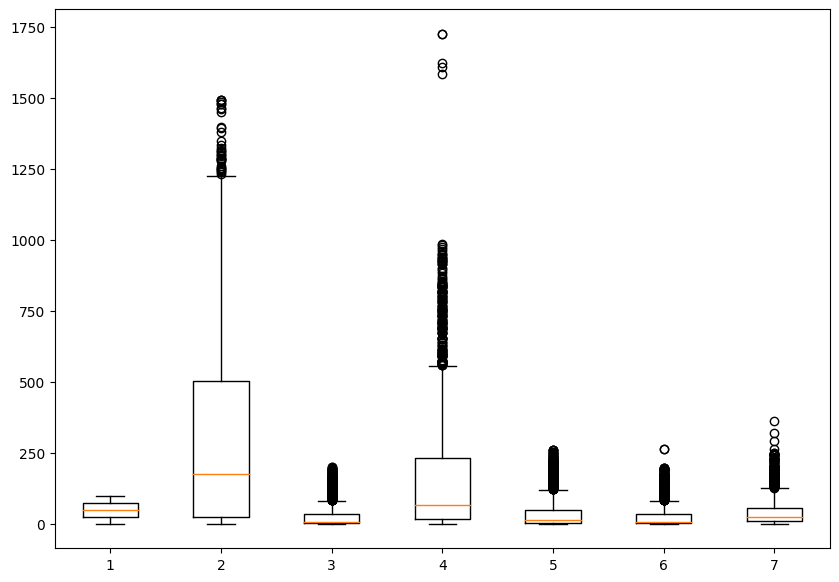

In [ ]:
# Building box plot to identify outliers
data = [Superstore_Data["Recency"],             # 1
        Superstore_Data["MntWines"],            # 2
        Superstore_Data["MntFruits"],           # 3
        Superstore_Data["MntMeatProducts"],     # 4
        Superstore_Data["MntFishProducts"],     # 5
        Superstore_Data["MntSweetProducts"],    # 6
        Superstore_Data["MntGoldProds"]]        # 7
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data)
plt.show()

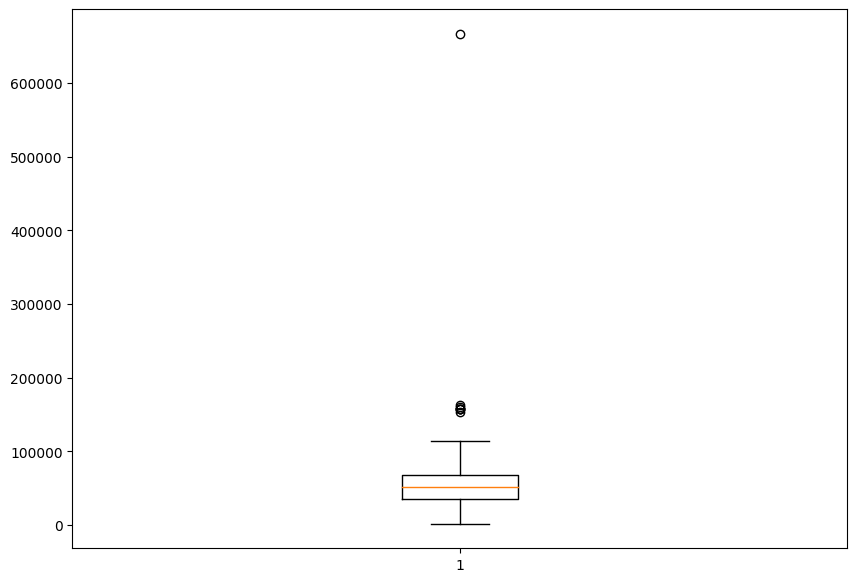

In [ ]:
# Building box plot to identify outliers in Income
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(Superstore_Data["Income"])
plt.show()

Since there is someone with an income above 6,00,000 (which is an outlier), I decided not to remove it as it can be dealt easily while creating ranges of income to create a categorial column out of it. Also, there are some outliers in meat products and that too we will not remove it as it could be beneficial to know that there are some customers who are willing to spend that much amount in that category.

### Task 3 - Probability Distributions

In the following graphs we will decide different distributions for different variables in the dataset. We will use 'Fitter' for this. By using the sum squared error, we will decide which distributuion fits the most for that variable. Whosever sum squared error will be least, will be choosen as the best.

In [ ]:
# First we define a function in which we pass all the distributions we want for that variable to be checked.

def get_common_distributions():
  """Returns a list of common probability distributions."""

  return [
      'bernoulli',
      'beta',
      'binomial',
      'chi2',
      'expon',
      'gamma',
      'lognorm',
      'norm',
      'poisson',
      'uniform',
      'cauchy',
      'exponpow'
  ]

#### Recency

sumsquare_error          aic          bic    kl_div  ks_statistic  \
uniform         0.000495   923.023970   934.452432  0.025385      0.020310   
beta            0.000559   929.487716   952.344641  0.028199      0.035302   
norm            0.001801   958.363548   969.792010  0.104568      0.068570   
gamma           0.001801   960.363547   977.506240  0.104572      0.068515   
cauchy          0.002903  1016.400902  1027.829364  0.181556      0.130847   

            ks_pvalue  
uniform  3.096966e-01  
beta     7.338903e-03  
norm     1.331705e-09  
gamma    1.377691e-09  
cauchy   6.720817e-34

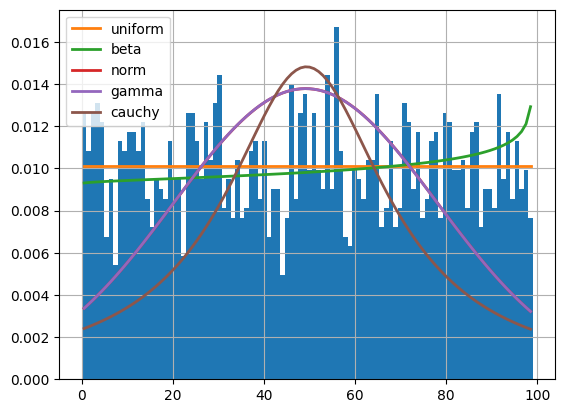

In [ ]:
f = Fitter(Superstore_Data['Recency'],
           distributions= get_common_distributions())
plt.title('Different Distribution Charts for Recency')
f.fit()
f.summary()

'Recency' follows Uniform distribution as the sum squared error is least among all.

In [ ]:
# probaiblity that observations are in the range of 0-40
stats.uniform.cdf(x=40, loc=min(Superstore_Data['Recency']), scale=max(Superstore_Data['Recency']))

0.40404040404040403

In [ ]:
# Expected value
Superstore_Data['Recency'].mean()

49.109375

#### Income

sumsquare_error           aic           bic  kl_div  ks_statistic  \
norm        6.343397e-11  20780.108251  20791.536713     inf      0.053376   
beta        8.242888e-11   6898.219409   6921.076333     inf      0.050272   
lognorm     8.702500e-11   6376.416694   6393.559387     inf      0.050951   
cauchy      3.151985e-10   3198.843217   3210.271680     inf      0.099537   
chi2        4.882780e-10   6819.390283   6836.532976     inf      0.284894   

             ks_pvalue  
norm      5.488475e-06  
beta      2.327992e-05  
lognorm   1.709645e-05  
cauchy    9.006613e-20  
chi2     2.173168e-161

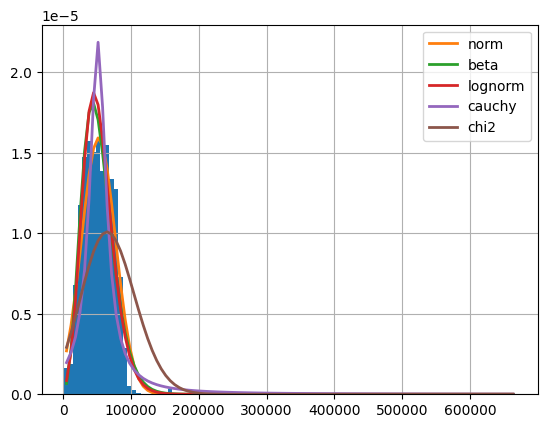

In [ ]:
f = Fitter(Superstore_Data['Income'],
           distributions= get_common_distributions())
plt.title('Different Distribution Charts for Income')
f.fit()
f.summary()

'Income' follows Normal distribution.

In [ ]:
# probaiblity that observations are in the range of 0-50000
stats.norm.cdf(x=50000, loc=Superstore_Data['Income'].mean(), scale= Superstore_Data['Income'].std())

0.46438864236995636

In [ ]:
# Expected value
Superstore_Data['Income'].mean()

52237.97544642857

#### Wines

sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.000040  1634.942691  1652.085384     inf      0.080361   
beta             0.000045  1618.674034  1641.530959     inf      0.095067   
exponpow         0.000046  1599.260396  1616.403089     inf      0.096176   
chi2             0.000058  1825.596519  1842.739213     inf      0.208731   
expon            0.000115  1638.585541  1650.014003     inf      0.200793   

             ks_pvalue  
gamma     4.966426e-13  
beta      4.523419e-18  
exponpow  1.740908e-18  
chi2      4.358854e-86  
expon     1.224494e-79

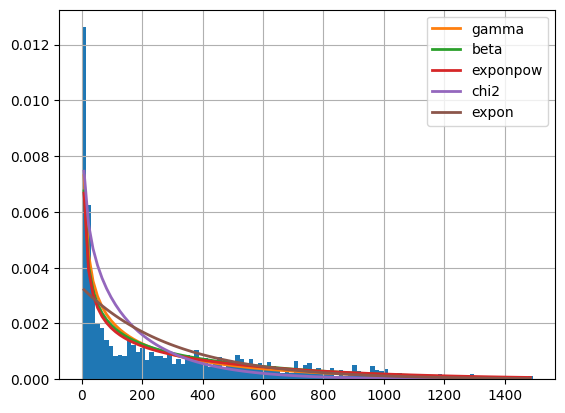

In [ ]:
f = Fitter(Superstore_Data['MntWines'],
           distributions= get_common_distributions())
plt.title('Different Distribution Charts for MntWines')
f.fit()
f.summary()

'MntWines' follows Gamma distribution.

In [ ]:
# probaiblity that observations are in the range of 0-400
shape_parameter = (Superstore_Data['MntWines'].mean())**2/Superstore_Data['MntWines'].var()
gamma.cdf(400, shape_parameter, loc=Superstore_Data['MntWines'].mean(), scale= Superstore_Data['MntWines'].std())

0.33948020315025856

In [ ]:
# Expected value
Superstore_Data['MntWines'].mean()

303.9357142857143

#### Fruits

sumsquare_error          aic          bic  kl_div  ks_statistic  \
chi2             0.001745  1336.141478  1353.284172     inf      0.178571   
gamma            0.001818  1364.545265  1381.687959     inf      0.178571   
exponpow         0.002369  1300.956208  1318.098901     inf      0.178571   
beta             0.004652  1208.940728  1231.797653     inf      0.178571   
cauchy           0.009186  1549.609523  1561.037986     inf      0.311300   

              ks_pvalue  
chi2       5.830722e-63  
gamma      5.830721e-63  
exponpow   5.830721e-63  
beta       5.830721e-63  
cauchy    2.481272e-193

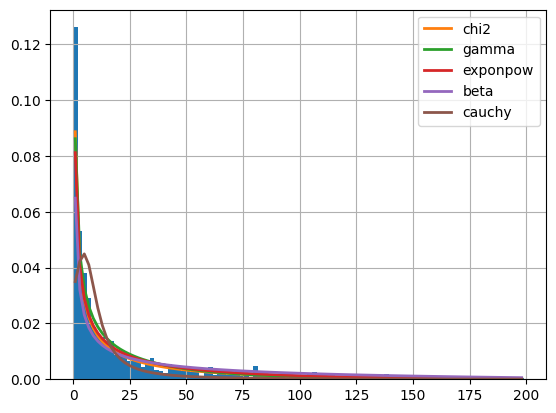

In [ ]:
f = Fitter(Superstore_Data['MntFruits'],
           distributions= get_common_distributions())
plt.title('Different Distribution Charts for MntFruits')
f.fit()
f.summary()

'MntFruits' follows Chi-squared distribution.

In [ ]:
# cumulative distribution function with 'number of degree of freedom' = 'mean' as shape parameter
stats.chi2.cdf(20, df=26.302232142857143)

0.19601017075255478

In [ ]:
# Expected value
Superstore_Data['MntFruits'].mean()

26.302232142857143

#### Meat

sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.000013  1828.842412  1845.985105     inf      0.056853   
beta             0.000049  1902.230428  1925.087353     inf      0.098607   
chi2             0.000049  1886.926062  1904.068756     inf      0.099487   
gamma            0.000050  1886.150300  1903.292994     inf      0.102444   
exponpow         0.000052  1893.219187  1910.361881     inf      0.088901   

             ks_pvalue  
lognorm   9.811954e-07  
beta      2.066459e-19  
chi2      9.422751e-20  
gamma     6.400848e-21  
exponpow  7.454762e-16

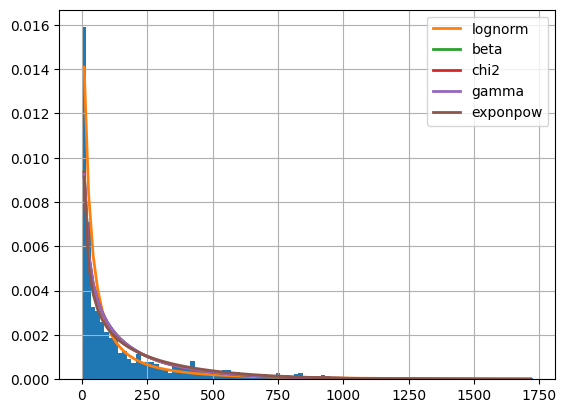

In [ ]:
f = Fitter(Superstore_Data['MntMeatProducts'],
           distributions= get_common_distributions())
plt.title('Different Distribution Charts for MntMeatProducts')
f.fit()
f.summary()

'MntMeatProducts' follows Log_Normal distribution. The log-normal distribution is a right skewed continuous probability distribution, meaning it has a long tail towards the right.

In [ ]:
# probaiblity that observations are in the range of 0-200
stats.norm.cdf(x=200, loc=Superstore_Data['MntMeatProducts'].mean(), scale= Superstore_Data['MntMeatProducts'].std())

0.5582064006064354

In [ ]:
# Expected value
Superstore_Data['MntMeatProducts'].mean()

166.95

#### Fish

sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.002088  1473.934719  1491.077412     inf      0.171429   
beta             0.002512  1264.283561  1287.140486     inf      0.171429   
exponpow         0.002697  1266.742292  1283.884986     inf      0.171429   
chi2             0.003199  1276.592790  1293.735484     inf      0.188223   
expon            0.005650  1419.202173  1430.630635     inf      0.252200   

              ks_pvalue  
gamma      5.004421e-58  
beta       5.004421e-58  
exponpow   5.004421e-58  
chi2       5.882369e-70  
expon     4.740511e-126

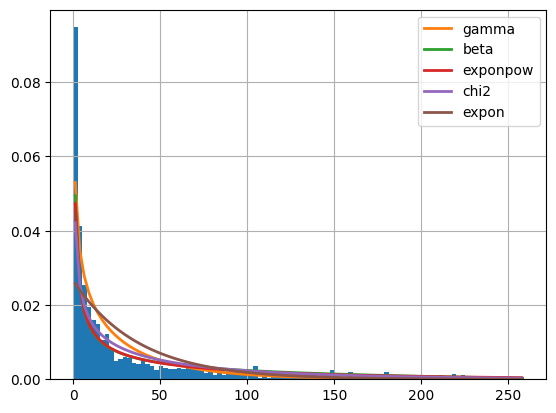

In [ ]:
f = Fitter(Superstore_Data['MntFishProducts'],
           distributions= get_common_distributions())
plt.title('Disfferent Distribution Charts for MntFishProducts')
f.fit()
f.summary()

'MntFishProducts' follows Gamma distribution.

In [ ]:
# probaiblity that observations are in the range of 0-100
shape_parameter = (Superstore_Data['MntFishProducts'].mean())**2/Superstore_Data['MntFishProducts'].var()
gamma.cdf(100, shape_parameter, loc=Superstore_Data['MntFishProducts'].mean(), scale= Superstore_Data['MntFishProducts'].std())

0.8789015940672236

In [ ]:
# Expected value
Superstore_Data['MntFishProducts'].mean()

37.52544642857143

#### Sweets

sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma          0.000878  2021.184734  2038.327427     inf      0.270209   
chi2           0.002450  1450.352852  1467.495546     inf      0.187054   
beta           0.002481  1787.905130  1810.762054     inf      0.187054   
cauchy         0.007910  1656.039052  1667.467514     inf      0.313774   
expon          0.008137  1635.441550  1646.870012     inf      0.260368   

            ks_pvalue  
gamma   6.011048e-145  
chi2     4.341905e-69  
beta     4.341903e-69  
cauchy  1.753667e-196  
expon   1.892248e-134

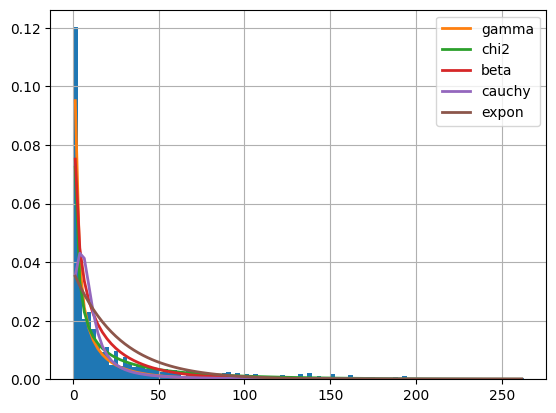

In [ ]:
f = Fitter(Superstore_Data['MntSweetProducts'],
           distributions= get_common_distributions())
plt.title('Different Distribution Charts for MntSweetProducts')
f.fit()
f.summary()


'MntSweetProducts' follows Gamma distribution.

In [ ]:
# probaiblity that observations are in the range of 0-40
shape_parameter = (Superstore_Data['MntSweetProducts'].mean())**2/Superstore_Data['MntSweetProducts'].var()
stats.gamma.cdf(40, shape_parameter, loc=Superstore_Data['MntSweetProducts'].mean(), scale= Superstore_Data['MntSweetProducts'].std())

0.6264050150745198

In [ ]:
# Expected value
Superstore_Data['MntSweetProducts'].mean()

27.06294642857143

In [ ]:
Superstore_Data['MntSweetProducts'].std()

41.280498487854935

#### Gold

sumsquare_error          aic          bic  kl_div  ks_statistic  \
chi2             0.000128  1632.029341  1649.172034     inf      0.064162   
gamma            0.000169  1536.794263  1553.936956     inf      0.069195   
exponpow         0.000332  1455.244003  1472.386696     inf      0.125521   
expon            0.000345  1583.255784  1594.684246     inf      0.096958   
beta             0.000554  1334.347231  1357.204156     inf      0.204426   

             ks_pvalue  
chi2      1.845831e-08  
gamma     9.042581e-10  
exponpow  3.196074e-31  
expon     8.820770e-19  
beta      1.473823e-82

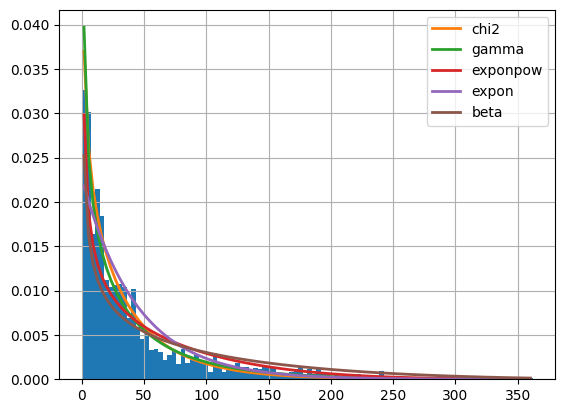

In [ ]:
f = Fitter(Superstore_Data['MntGoldProds'],
           distributions= get_common_distributions())
plt.title('Disfferent Distribution Charts for MntGoldProds')
f.fit()
f.summary()

'MntGoldProds' follows Chi-squared distribution.

In [ ]:
# cumulative distribution function with 'number of degree of freedom' = 'mean' as shape parameter
stats.chi2.cdf(50, df=44.021875)

0.751975063374326

In [ ]:
# Expected value
Superstore_Data['MntGoldProds'].mean()

44.021875

#### Catalogue Purchases

sumsquare_error          aic          bic  kl_div  ks_statistic  \
beta             1.003071  1305.620506  1328.477430     inf      0.361120   
gamma            1.010386  1167.984779  1185.127473     inf      0.262774   
exponpow         1.044352   894.365638   911.508331     inf      0.261607   
chi2             1.064427  1288.194294  1305.336987     inf      0.261607   
expon            1.255523  1251.639123  1263.067585     inf      0.261607   

              ks_pvalue  
beta      3.771960e-262  
gamma     5.615114e-137  
exponpow  9.514604e-136  
chi2      9.514604e-136  
expon     9.514604e-136

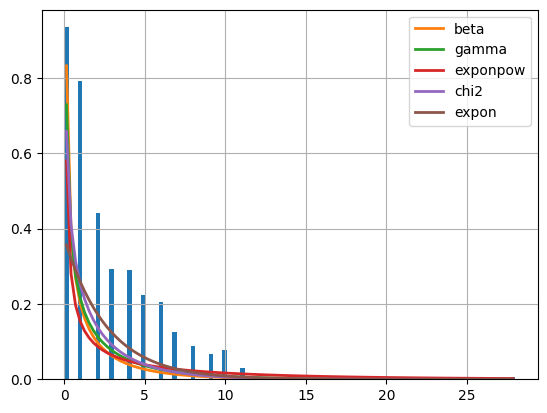

In [ ]:
f = Fitter(Superstore_Data['NumCatalogPurchases'],
           distributions= get_common_distributions())
plt.title('Different Distribution Charts for NumCatalogPurchases')
f.fit()
f.summary()

'NumCatalogPurchases' follows Beta distribution.

In [ ]:
# probaiblity that observations are in the range of 0-7
stats.norm.cdf(x= 7, loc=Superstore_Data['NumCatalogPurchases'].mean(), scale= Superstore_Data['NumCatalogPurchases'].std())

0.9310984918040432

In [ ]:
# Expected value
Superstore_Data['NumCatalogPurchases'].mean()

#### Number Website Visits per Month

sumsquare_error          aic          bic  kl_div  ks_statistic  \
norm            2.565294  1303.971579  1315.400042     inf      0.133242   
beta            2.572503  1200.632679  1223.489603     inf      0.140179   
lognorm         2.572944  1191.451453  1208.594146     inf      0.140550   
gamma           2.573680  1180.987655  1198.130348     inf      0.141452   
cauchy          2.615651   793.769129   805.197592     inf      0.153961   

            ks_pvalue  
norm     3.856136e-35  
beta     7.298732e-39  
lognorm  4.555150e-39  
gamma    1.442500e-39  
cauchy   7.860760e-47

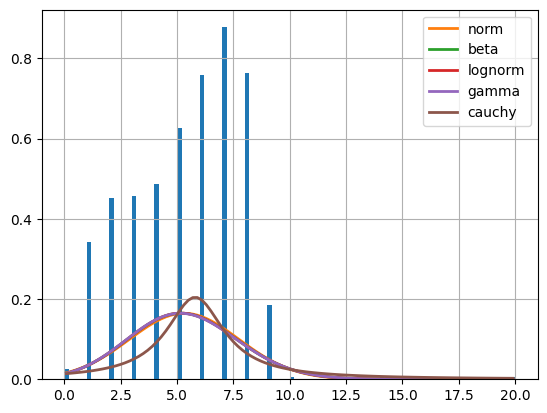

In [ ]:
f = Fitter(Superstore_Data['NumWebVisitsMonth'],
           distributions= get_common_distributions())
plt.title('Different Distribution Charts for NumWebVisitsMonth')
f.fit()
f.summary()

'NumWebVisitsMonth' follows Normal distribution.

In [ ]:
# probaiblity that observations are in the range of 0-5
stats.norm.cdf(x= 5, loc=Superstore_Data['NumWebVisitsMonth'].mean(), scale= Superstore_Data['NumWebVisitsMonth'].std())

0.4481113968736764

In [ ]:
# Expected value
Superstore_Data['NumWebVisitsMonth'].mean()

5.316517857142857

#### Customer Age

sumsquare_error          aic          bic  kl_div  ks_statistic  \
beta            0.001358  1444.120176  1466.977100     inf      0.052964   
chi2            0.001373  1421.323142  1438.465835     inf      0.054263   
gamma           0.001373  1421.323362  1438.466055     inf      0.054263   
lognorm         0.001384  1421.984962  1439.127655     inf      0.054725   
norm            0.001425  1711.785704  1723.214166     inf      0.059340   

            ks_pvalue  
beta     6.683497e-06  
chi2     3.575003e-06  
gamma    3.574980e-06  
lognorm  2.851659e-06  
norm     2.679619e-07

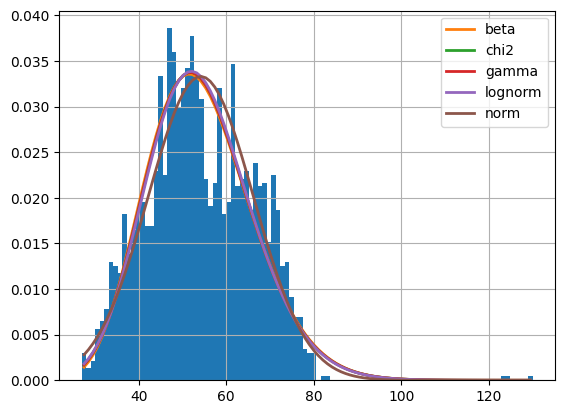

In [ ]:
f = Fitter(Superstore_Data['Customer_Age'],
           distributions= get_common_distributions())
plt.title('Different Distribution Charts for Customer_Age')
f.fit()
f.summary()

'Customer_Age' follows Beta distribution.

In [ ]:
# probaiblity that observations are in the range of 0-50
stats.norm.cdf(x= 50, loc=Superstore_Data['Customer_Age'].mean(), scale= Superstore_Data['Customer_Age'].std())

0.3631764841766425

In [ ]:
# Expected value
Superstore_Data['Customer_Age'].mean()

54.19419642857143

### Task 4 - Insights and Customer Segmentation (Visualizations)

#### Chart 1 (Heatmap) - Multivariate

<ipython-input-18-43a3451837b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_Heatmap = sns.heatmap(Superstore_Data.corr(), cmap="Blues")


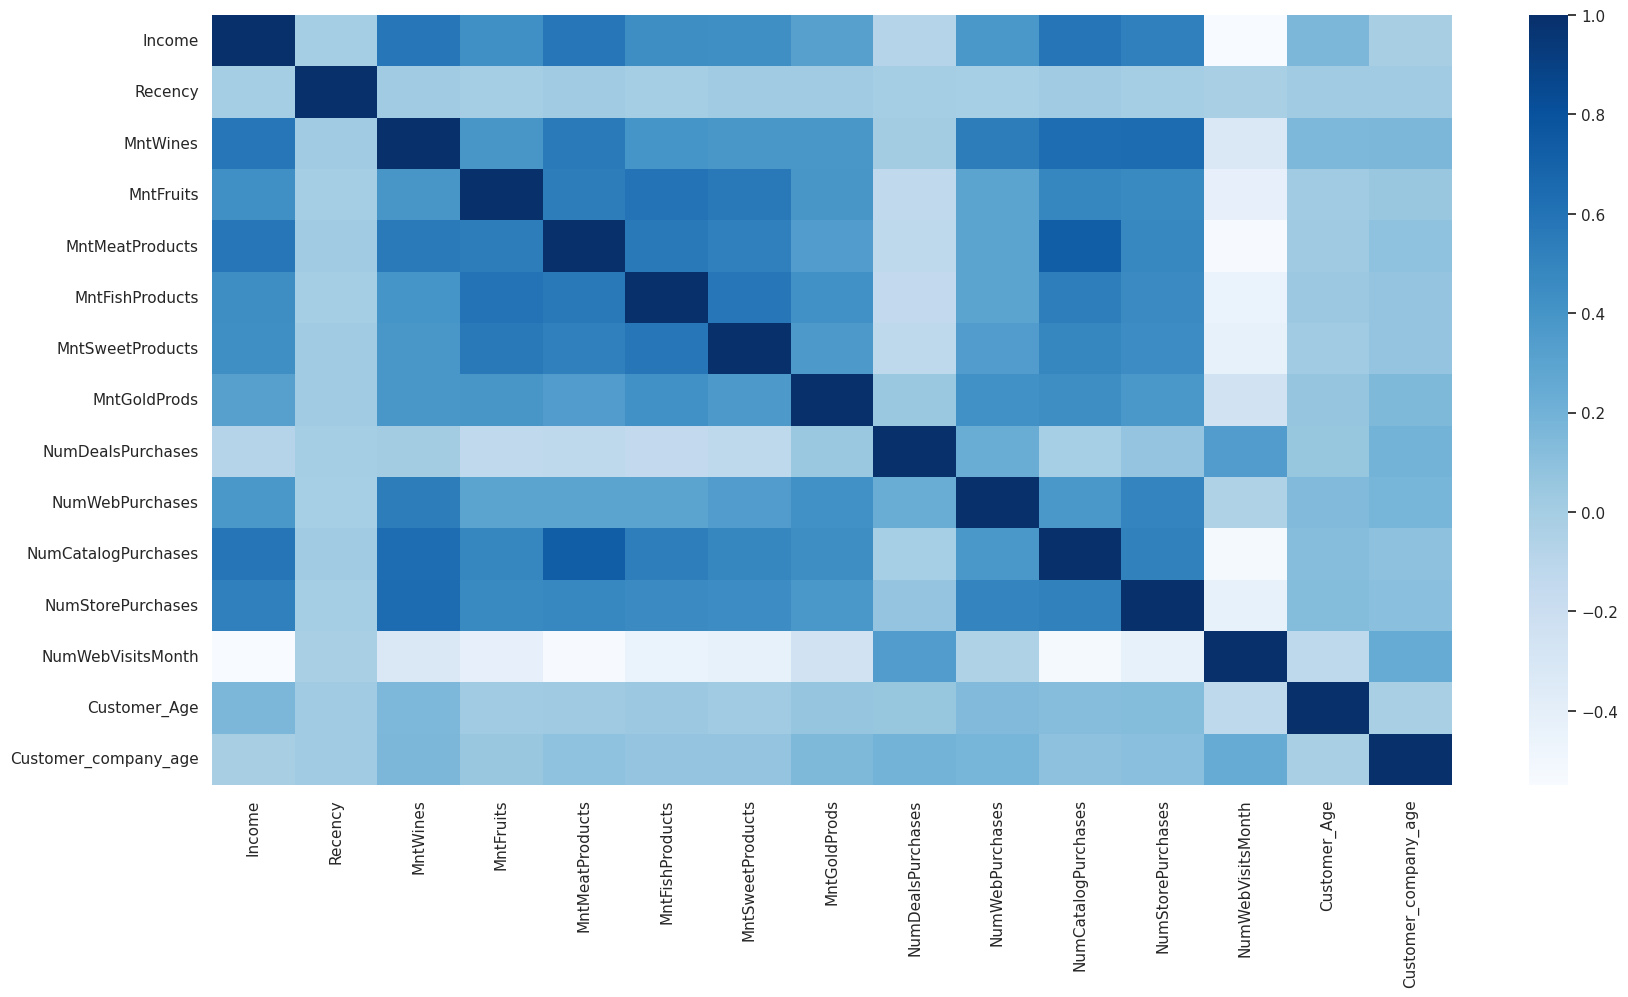

In [ ]:
# Heatmap for various numeric variables of Superstore data
Correlation_Heatmap = sns.heatmap(Superstore_Data.corr(), cmap="Blues")

From the above chart we can see the different positive (if one increses other also increases and vice-versa) and negative (if one increses other also decreases and vice-versa) relationships if we take two variables at a time. Some important relations are -


Income and Wines have positive relation.
Meat and Catalogue purchases have positive relation.
Number of website visits mostly have negative relation with many varibales.
Income and Meat have positive relation.
Income and Catalogue purchases have positive relation.
Wine has positive relation with both Catalogue and Store Purchases.



#### Chart 2 (Pairplot) - Multivariate

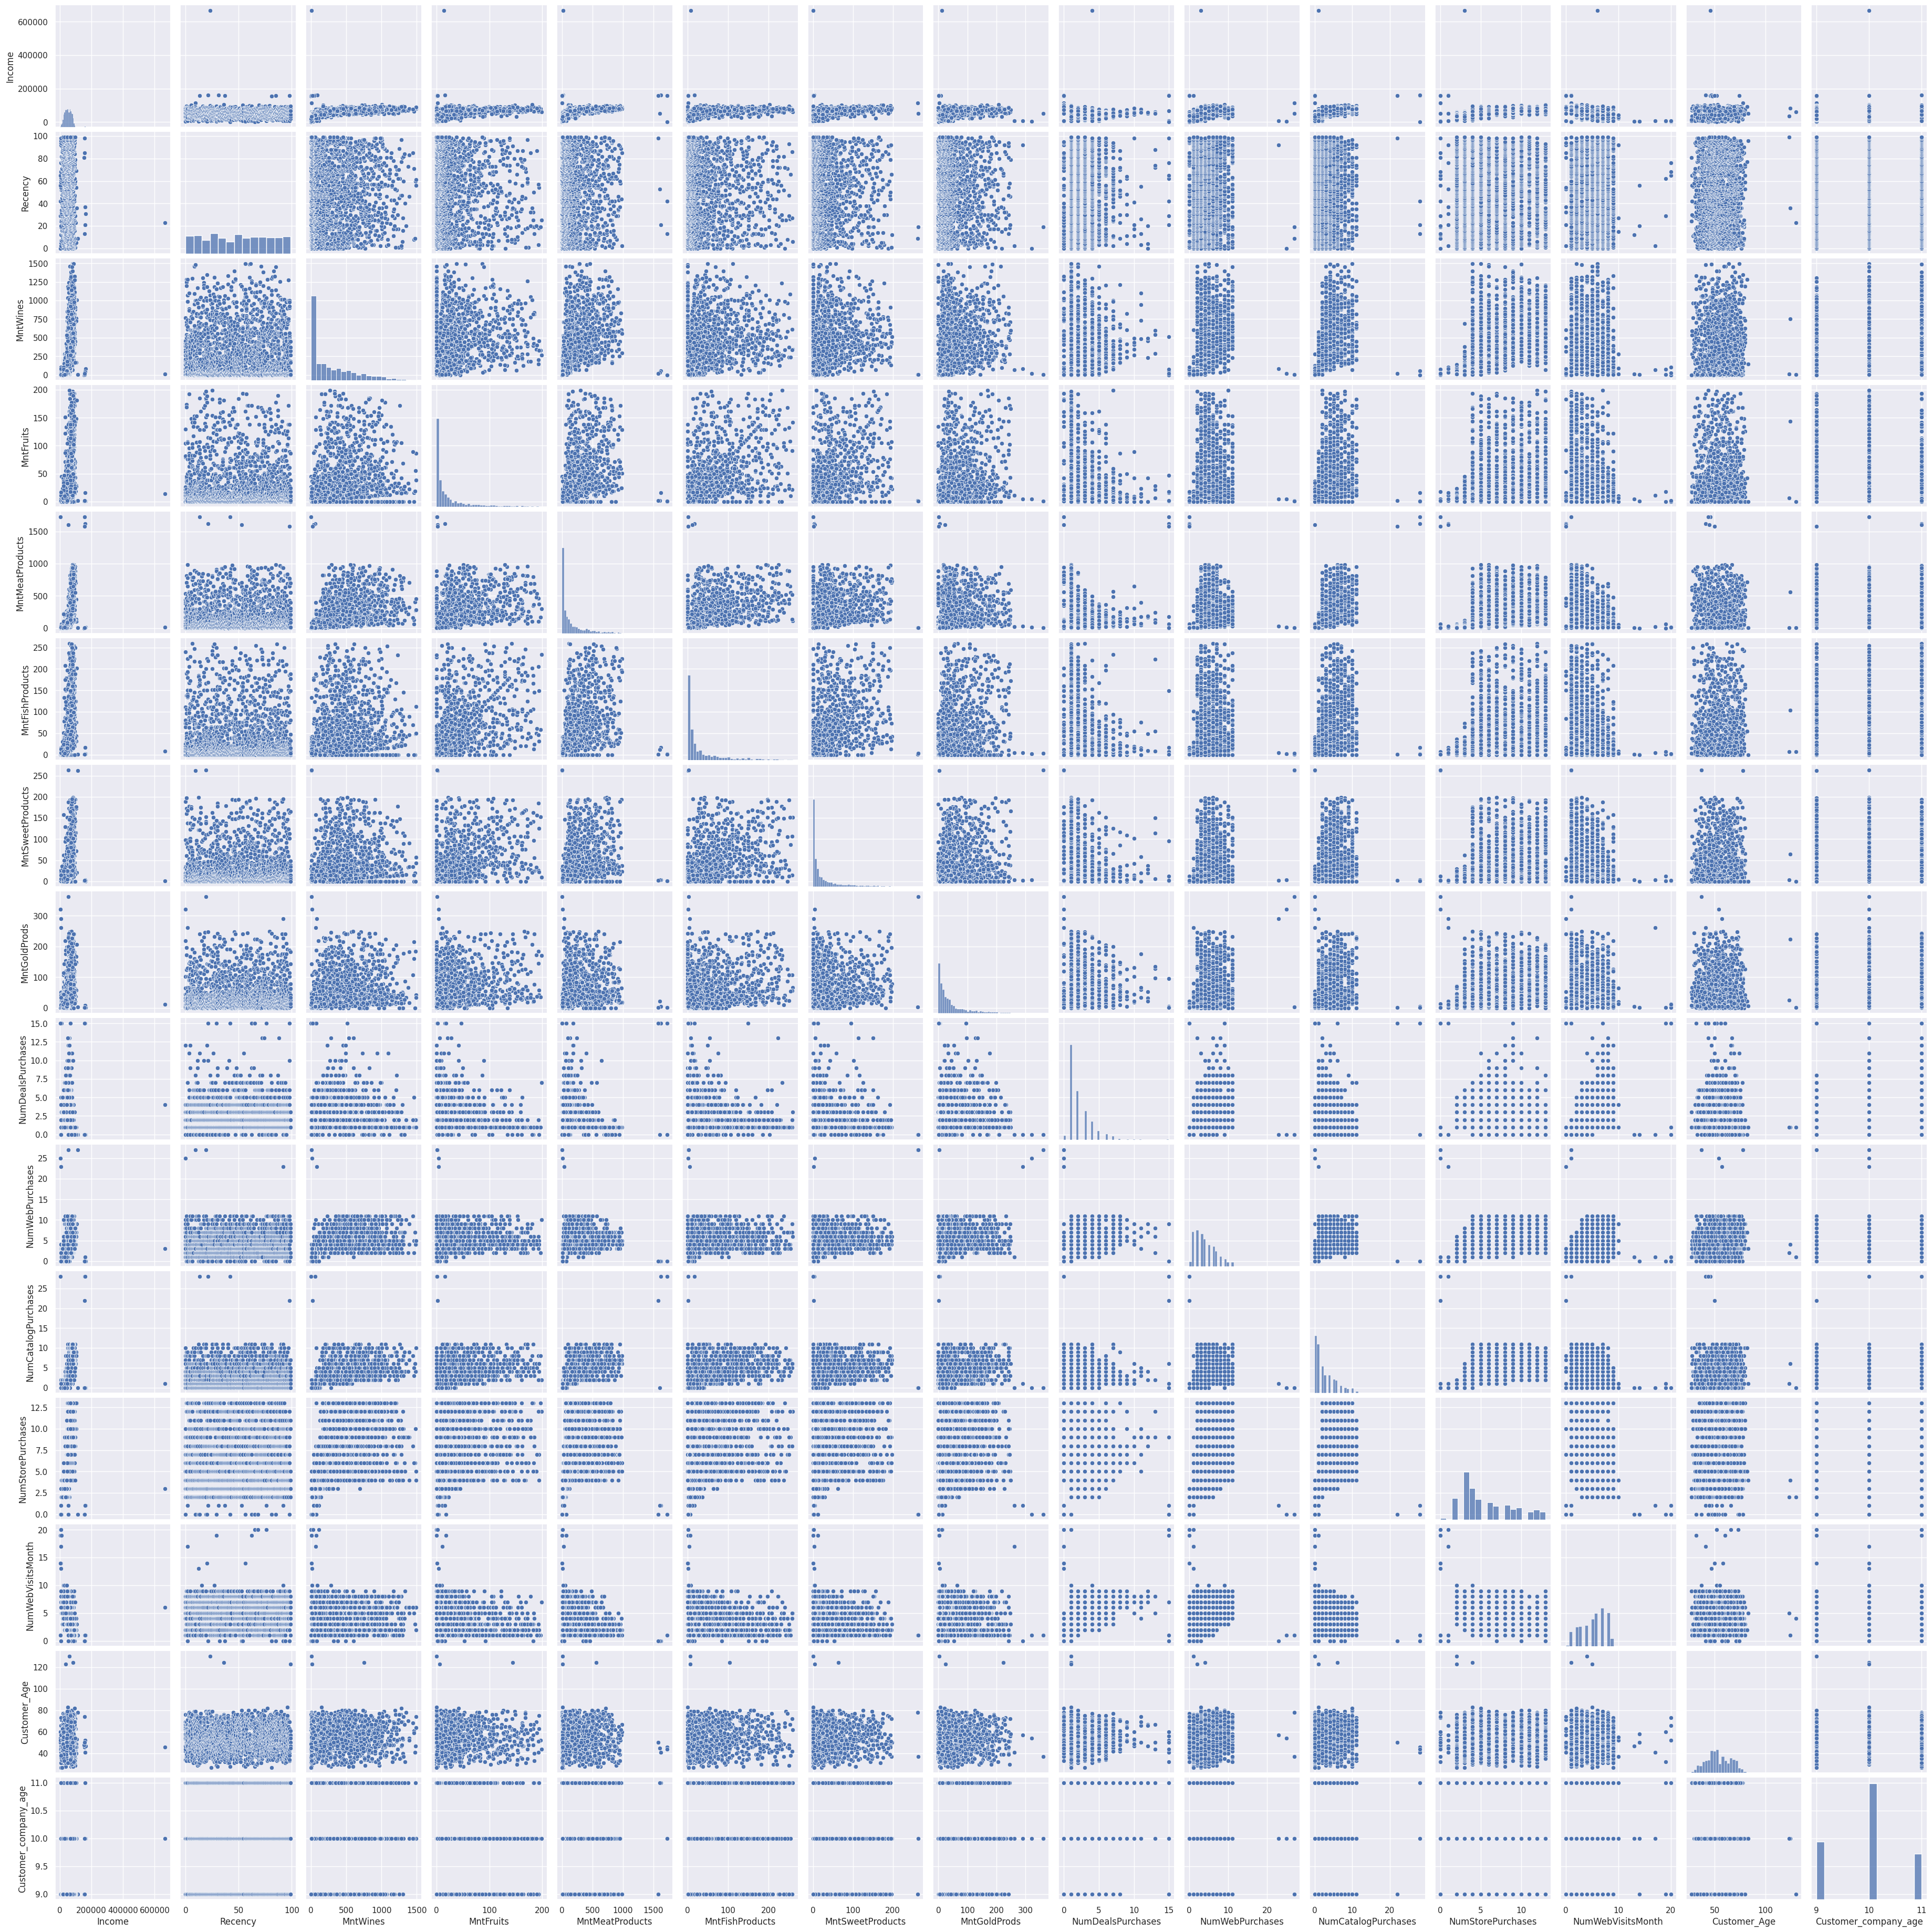

In [ ]:
# Pairplot to show relationship between two variables at a time through scatter plot

sns.pairplot(Superstore_Data)

#### Chart 3 - Product types and Marital Status

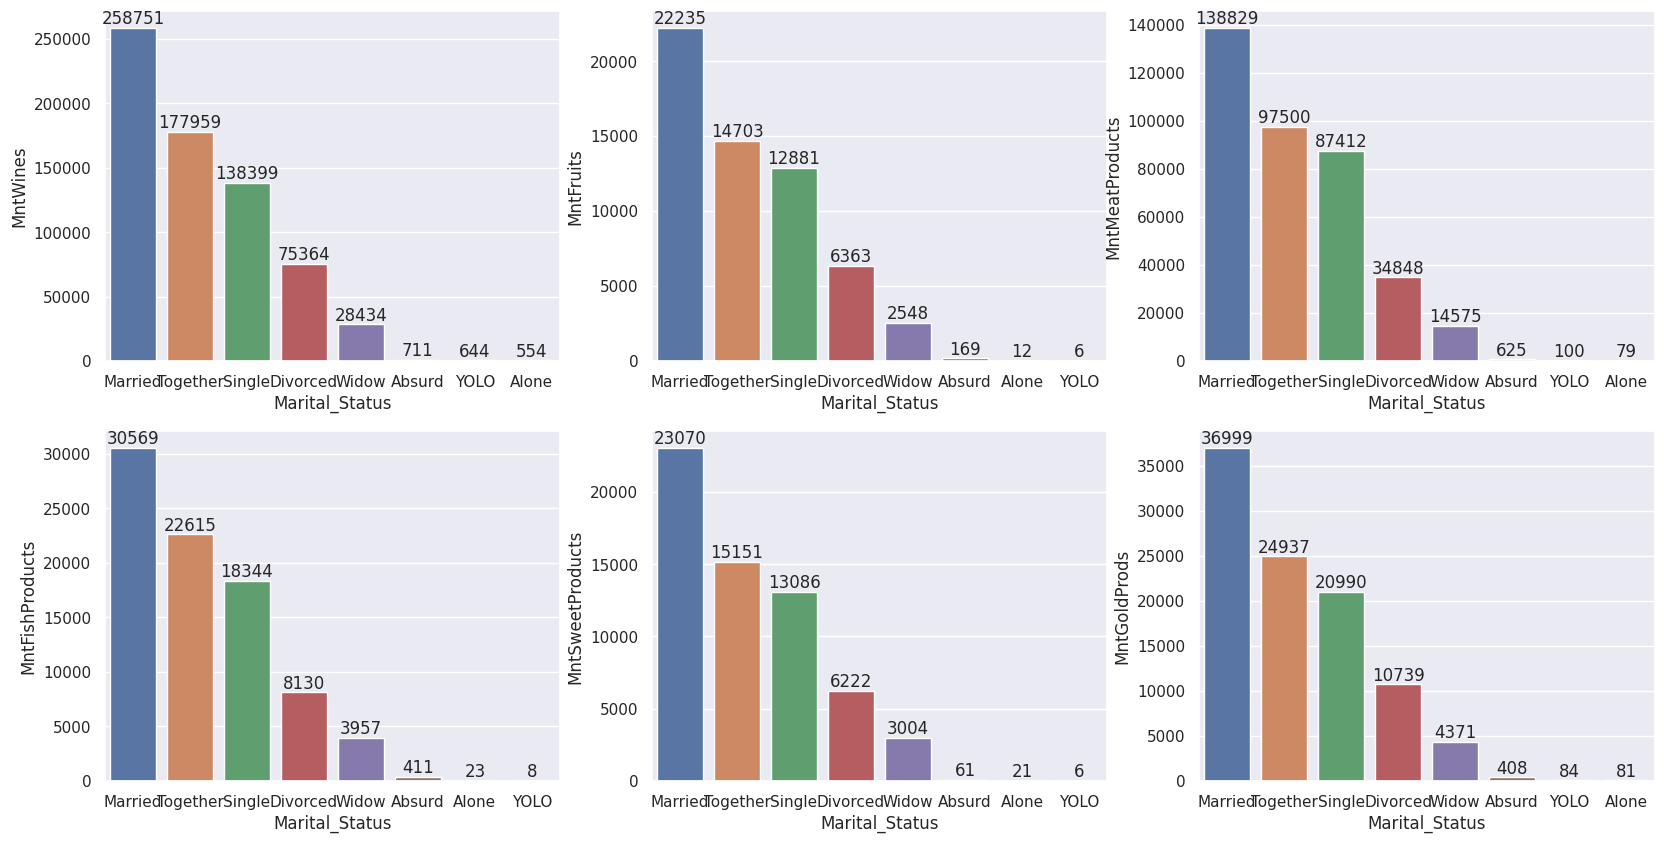

In [ ]:
# Here I will use subplot to show the purchasing pattern among different products by different Marital status.

plt.subplot(2, 3, 1)
sns.set(rc={'figure.figsize':(20,10)})
mar_wine = Superstore_Data.groupby(['Marital_Status'], as_index=False)['MntWines'].sum().sort_values(by='MntWines', ascending=False)
ax = sns.barplot(x = 'Marital_Status', y= 'MntWines' ,data = mar_wine)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 2)
sns.set(rc={'figure.figsize':(20,10)})
mar_fruit = Superstore_Data.groupby(['Marital_Status'], as_index=False)['MntFruits'].sum().sort_values(by='MntFruits', ascending=False)
ax = sns.barplot(x = 'Marital_Status', y= 'MntFruits' ,data = mar_fruit)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 3)
sns.set(rc={'figure.figsize':(20,10)})
mar_meat = Superstore_Data.groupby(['Marital_Status'], as_index=False)['MntMeatProducts'].sum().sort_values(by='MntMeatProducts', ascending=False)
ax = sns.barplot(x = 'Marital_Status', y= 'MntMeatProducts' ,data = mar_meat)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 4)
sns.set(rc={'figure.figsize':(20,10)})
mar_fish = Superstore_Data.groupby(['Marital_Status'], as_index=False)['MntFishProducts'].sum().sort_values(by='MntFishProducts', ascending=False)
ax = sns.barplot(x = 'Marital_Status', y= 'MntFishProducts' ,data = mar_fish)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 5)
sns.set(rc={'figure.figsize':(20,10)})
mar_sweet = Superstore_Data.groupby(['Marital_Status'], as_index=False)['MntSweetProducts'].sum().sort_values(by='MntSweetProducts', ascending=False)
ax = sns.barplot(x = 'Marital_Status', y= 'MntSweetProducts' ,data = mar_sweet)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 6)
sns.set(rc={'figure.figsize':(20,10)})
mar_gold = Superstore_Data.groupby(['Marital_Status'], as_index=False)['MntGoldProds'].sum().sort_values(by='MntGoldProds', ascending=False)
ax = sns.barplot(x = 'Marital_Status', y= 'MntGoldProds' ,data = mar_gold)
for bars in ax.containers:
    ax.bar_label(bars)

From the above charts, we can see that spending pattern is almost same for Married, Together, Single, Divorced, Widow and Absurd fro all product type with Married people spending the most of all. Spending of Together and Single is approximately same for all products. Divorced spends nearly half of what Single spends and further Widow spends half of what Divorced spends for all products.

Also, total spending in wines is highest of all. Second comes meat. Least spending is for fruits and sweets. Spending pattern for fish and gold product is similar approximately.

#### Chart 4 - Product types and Education Status

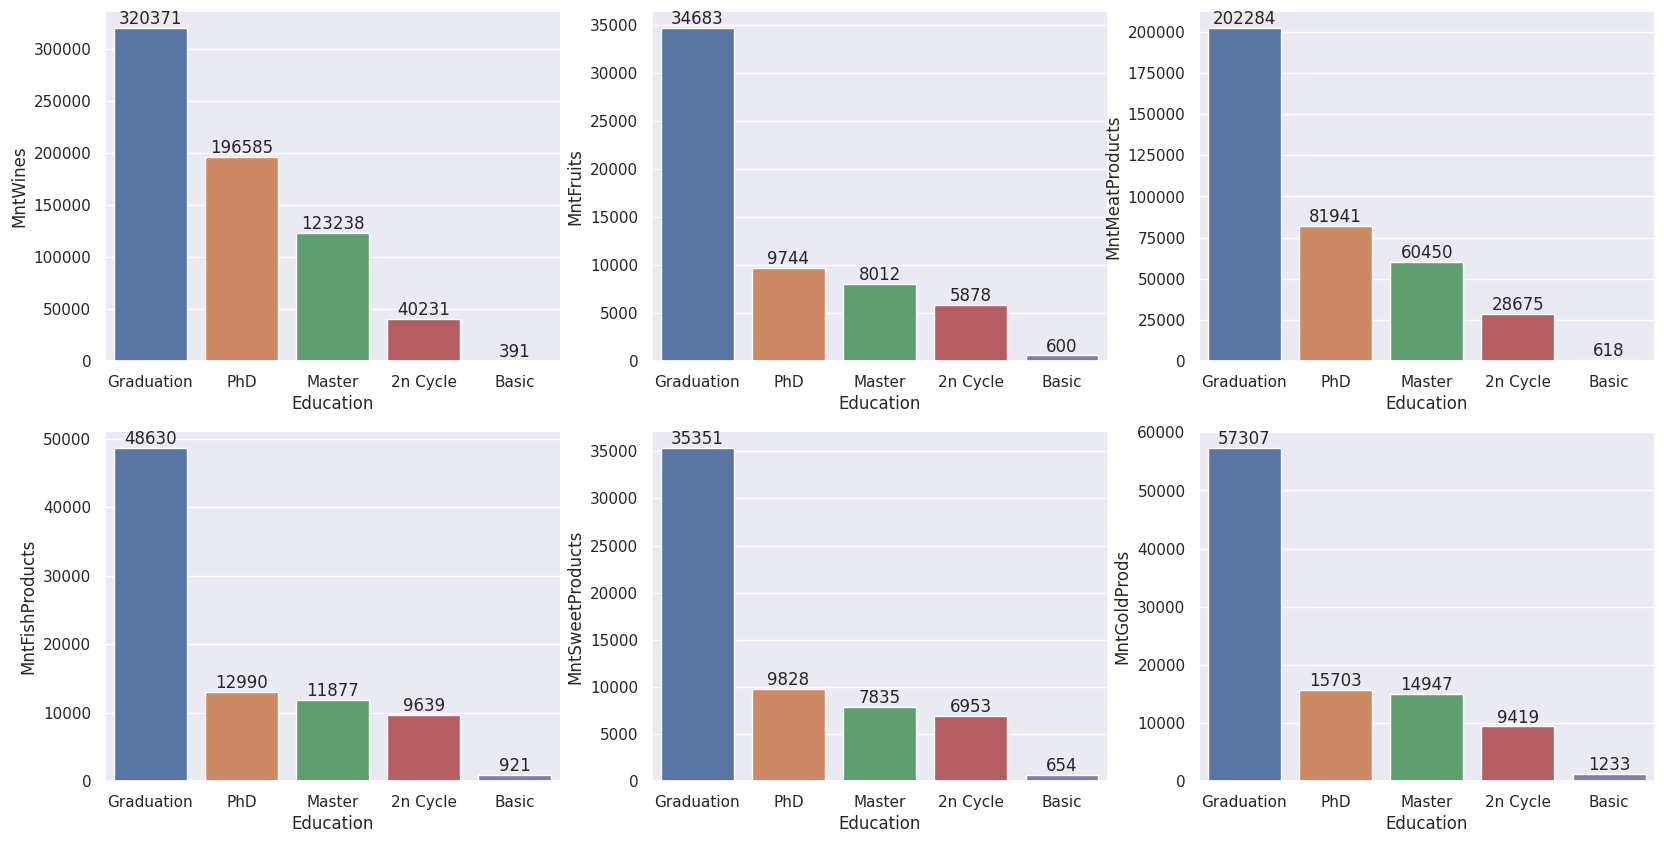

In [ ]:
# Here I will use subplot to show the purchasing pattern among different products by people from different Education status.

plt.subplot(2, 3, 1)
sns.set(rc={'figure.figsize':(20,10)})
edu_wine = Superstore_Data.groupby(['Education'], as_index=False)['MntWines'].sum().sort_values(by='MntWines', ascending=False)
ax = sns.barplot(x = 'Education', y= 'MntWines' ,data = edu_wine)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 2)
sns.set(rc={'figure.figsize':(20,10)})
edu_fruit = Superstore_Data.groupby(['Education'], as_index=False)['MntFruits'].sum().sort_values(by='MntFruits', ascending=False)
ax = sns.barplot(x = 'Education', y= 'MntFruits' ,data = edu_fruit)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 3)
sns.set(rc={'figure.figsize':(20,10)})
edu_meat = Superstore_Data.groupby(['Education'], as_index=False)['MntMeatProducts'].sum().sort_values(by='MntMeatProducts', ascending=False)
ax = sns.barplot(x = 'Education', y= 'MntMeatProducts' ,data = edu_meat)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 4)
sns.set(rc={'figure.figsize':(20,10)})
edu_fish = Superstore_Data.groupby(['Education'], as_index=False)['MntFishProducts'].sum().sort_values(by='MntFishProducts', ascending=False)
ax = sns.barplot(x = 'Education', y= 'MntFishProducts' ,data = edu_fish)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 5)
sns.set(rc={'figure.figsize':(20,10)})
edu_sweet = Superstore_Data.groupby(['Education'], as_index=False)['MntSweetProducts'].sum().sort_values(by='MntSweetProducts', ascending=False)
ax = sns.barplot(x = 'Education', y= 'MntSweetProducts' ,data = edu_sweet)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 6)
sns.set(rc={'figure.figsize':(20,10)})
edu_gold = Superstore_Data.groupby(['Education'], as_index=False)['MntGoldProds'].sum().sort_values(by='MntGoldProds', ascending=False)
ax = sns.barplot(x = 'Education', y= 'MntGoldProds' ,data = edu_gold)
for bars in ax.containers:
    ax.bar_label(bars)

From the above charts, we can see that spending pattern is almost same for all educational status for all product type with Graduated people spending the most of all with a large range. People with PhD, 2n cycle and Basic are spending least in Fruits, but customers with Master Education are spending least in Sweets.

Also, total spending in wines is highest of all. Second comes meat. Least spending is for fruits and sweets. Spending pattern for fish and gold product is similar approximately. Spending pattern for sweet and fruits product is similar approximately.

#### Chart 5 - Income and Purchasing source type

In [ ]:
# Here I will create an columns to classify people based on the income bars.
# Since, we know that there are very less customers whose salary is above 2,00,000, we can create a bin of 200-700k as there is one outlier also which is above 6,00,000.

Income = Superstore_Data['Income']
Superstore_Data['Income_Range'] = pd.cut(x = Income, bins=[0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 700000],
                     labels=['0-20k', '20k-40k', '40k-60k',
                             '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k-160k', '160k-180k', '180k-200k', '200k-700k'])
print(Superstore_Data['Income_Range'].value_counts())

40k-60k      667
60k-80k      624
20k-40k      605
80k-100k     204
0-20k        127
100k-120k      5
140k-160k      5
160k-180k      2
200k-700k      1
120k-140k      0
180k-200k      0
Name: Income_Range, dtype: int64


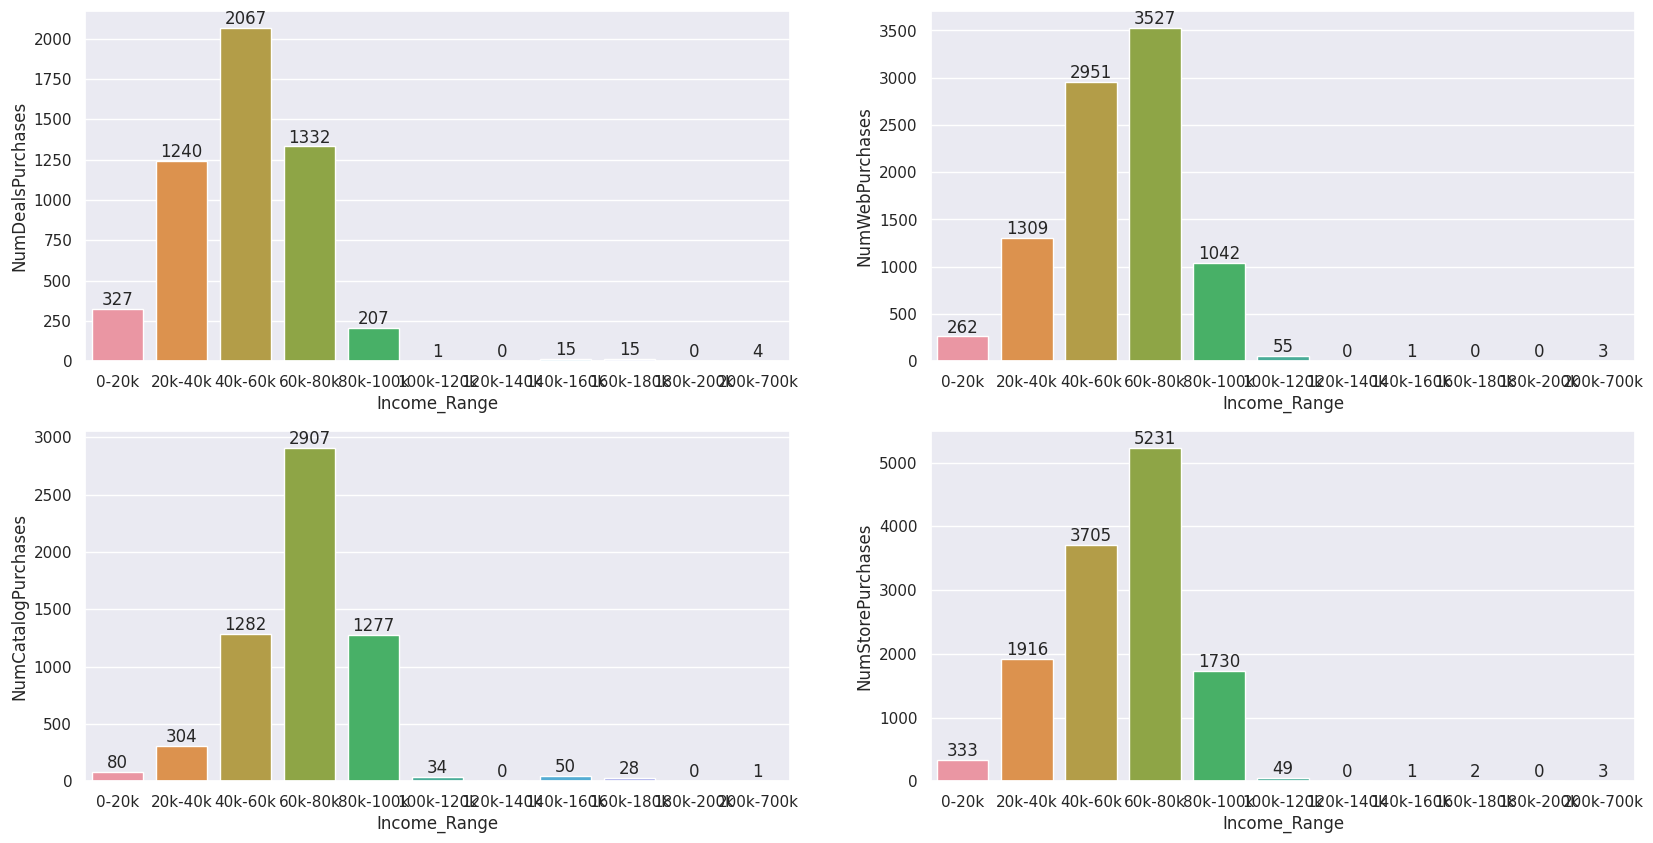

In [ ]:
# Here I will use subplot to show the buying preference patterns by people from different Incomes.

plt.subplot(2, 2, 1)
sns.set(rc={'figure.figsize':(50,10)})
inc_deal = Superstore_Data.groupby(['Income_Range'], as_index=False)['NumDealsPurchases'].sum().sort_values(by='NumDealsPurchases', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'NumDealsPurchases' ,data = inc_deal)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 2, 2)
sns.set(rc={'figure.figsize':(50,10)})
inc_web = Superstore_Data.groupby(['Income_Range'], as_index=False)['NumWebPurchases'].sum().sort_values(by='NumWebPurchases', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'NumWebPurchases' ,data = inc_web)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 2, 3)
sns.set(rc={'figure.figsize':(50,10)})
inc_cat = Superstore_Data.groupby(['Income_Range'], as_index=False)['NumCatalogPurchases'].sum().sort_values(by='NumCatalogPurchases', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'NumCatalogPurchases' ,data = inc_cat)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 2, 4)
sns.set(rc={'figure.figsize':(50,10)})
inc_store = Superstore_Data.groupby(['Income_Range'], as_index=False)['NumStorePurchases'].sum().sort_values(by='NumStorePurchases', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'NumStorePurchases' ,data = inc_store)
for bars in ax.containers:
    ax.bar_label(bars)

In Catalogue, Website and Store purchases, most purchases is from those whose income is between 60-80k. In Deal purchases, most purchases is from 40-60k income bar.

Customers with income 0-20k do not prefer Catalogue purchases.

Customers with income 20-40k, 40-60k, 60-80k, 80-100k prefer Store purchases.

Customers with income 20-40k, 40-60k do not prefer Catalogue purchases.

Customers with income 60-80k, 80-100k do not prefer Deal purchases.

#### Chart 6 - Product types and Income

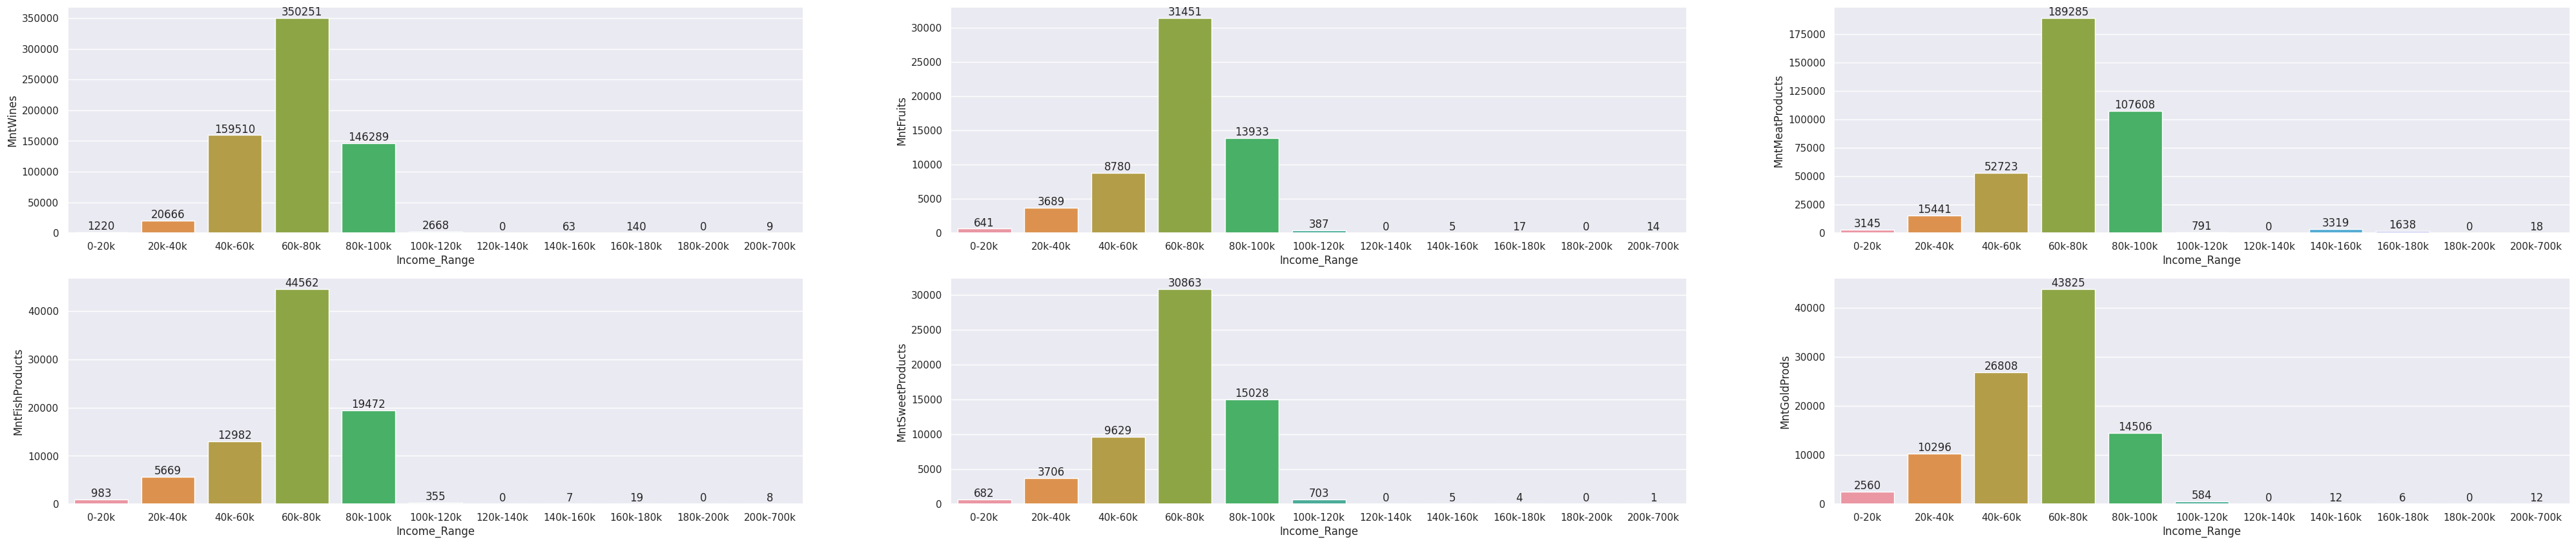

In [ ]:
# Here I will use subplot to show the purchasing pattern among different products by people from different Incomes.

plt.subplot(2, 3, 1)
sns.set(rc={'figure.figsize':(50,10)})
inc_wine = Superstore_Data.groupby(['Income_Range'], as_index=False)['MntWines'].sum().sort_values(by='MntWines', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'MntWines' ,data = inc_wine)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 2)
sns.set(rc={'figure.figsize':(50,10)})
inc_fruit = Superstore_Data.groupby(['Income_Range'], as_index=False)['MntFruits'].sum().sort_values(by='MntFruits', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'MntFruits' ,data = inc_fruit)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 3)
sns.set(rc={'figure.figsize':(50,10)})
inc_meat = Superstore_Data.groupby(['Income_Range'], as_index=False)['MntMeatProducts'].sum().sort_values(by='MntMeatProducts', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'MntMeatProducts' ,data = inc_meat)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 4)
sns.set(rc={'figure.figsize':(50,10)})
inc_fish = Superstore_Data.groupby(['Income_Range'], as_index=False)['MntFishProducts'].sum().sort_values(by='MntFishProducts', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'MntFishProducts' ,data = inc_fish)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 5)
sns.set(rc={'figure.figsize':(50,10)})
inc_sweet = Superstore_Data.groupby(['Income_Range'], as_index=False)['MntSweetProducts'].sum().sort_values(by='MntSweetProducts', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'MntSweetProducts' ,data = inc_sweet)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 6)
sns.set(rc={'figure.figsize':(50,10)})
inc_gold = Superstore_Data.groupby(['Income_Range'], as_index=False)['MntGoldProds'].sum().sort_values(by='MntGoldProds', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'MntGoldProds' ,data = inc_gold)
for bars in ax.containers:
    ax.bar_label(bars)

Maximum spending comes from income ranges 60-80k. Then comes 40-60k and 80-100k. 60-80k income customers are spending remarkably high in Wines.

Customers with income range of 20-40k, 40-60k, 60-80k are spending most in Wines and least in Fruits and Sweets alike.

Customers with income range of 80-100k are spending most in Wines and least in Gold.

In Fish, Fruits, Sweets and Meat, 80-100k are spending greater than 40-60k.

In Wines and Gold, 40-60k are spending greater than 80-100k.

#### Chart 7 - Pie charts for Univariate columns

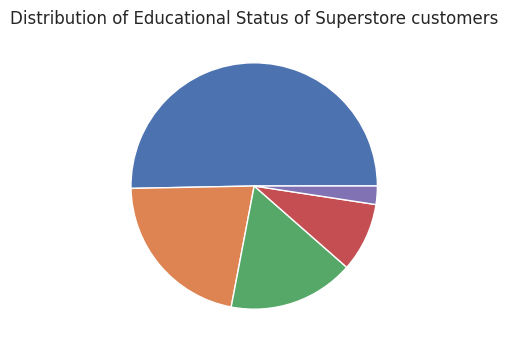

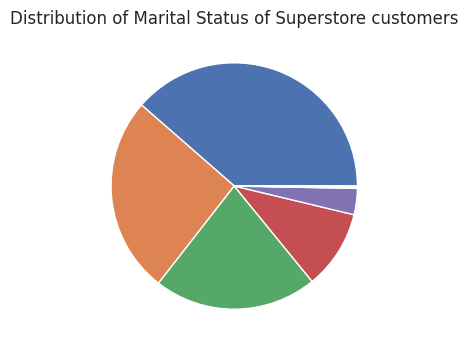

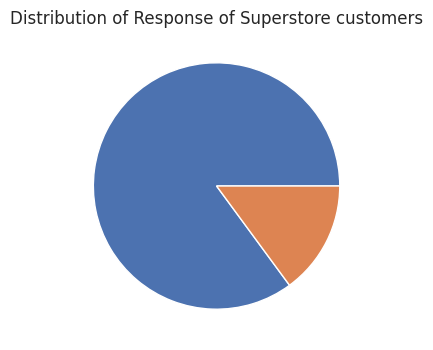

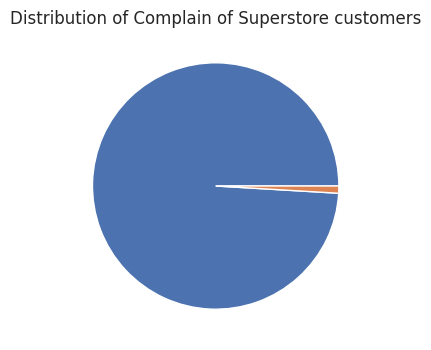

In [ ]:
# Here I will use subplot to show the distribution for 4 different univariate variables.


plt.rcParams['figure.figsize'] = [50, 4]
plt.subplot(1, 4, 1)
Education_count = Superstore_Data['Education'].value_counts()
plt.pie(Education_count)
plt.title('Distribution of Educational Status of Superstore customers')
plt.show()


plt.rcParams['figure.figsize'] = [50, 4]
plt.subplot(1, 4, 2)
Marital_count = Superstore_Data['Marital_Status'].value_counts()
plt.pie(Marital_count)
plt.title('Distribution of Marital Status of Superstore customers')
plt.show()


plt.rcParams['figure.figsize'] = [50, 4]
plt.subplot(1, 4, 3)
Response_count = Superstore_Data['Response'].value_counts()
plt.pie(Response_count)
plt.title('Distribution of Response of Superstore customers')
plt.show()


plt.rcParams['figure.figsize'] = [50, 4]
plt.subplot(1, 4, 4)
Complain_count = Superstore_Data['Complain'].value_counts()
plt.pie(Complain_count)
plt.title('Distribution of Complain of Superstore customers')
plt.show()

From first chart we can see that number of Graduates are maxumum with approx. 50%. Then comes PhD and Masters.

From second chart we infer that maximum customers are Married. Then comes Together and Single.

From third chart we infer that maximum customers reponded 0, which means
customer did not accepted the offer in the last campaign. Nearly 12.5% customers accepted the offer in the last campaign.

From forth chart we infer that maximum customers reponded 0, which means
customer complained in the last 2 years.

#### Chart 8 - Number of Website Visits + Recency + Customer Company Age (Multivariate)

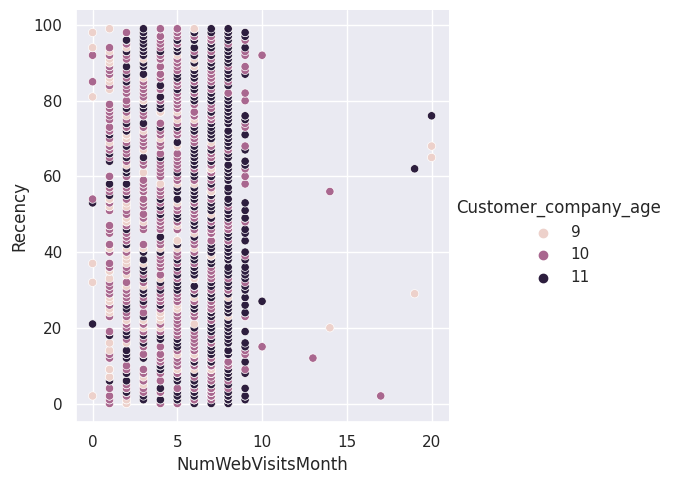

In [ ]:
# Here I used 3 dimensional scatter plot which vizualises 3 variables in one plot to see relationship between Number of website visits, Recency and Customer company age.

sns.relplot(data=Superstore_Data, x="NumWebVisitsMonth", y="Recency", hue="Customer_company_age")

When the Customer-company age is 9-10 years, most of them visits the webiste 1-2 times a month.

When the Customer-company age is 10-11 years, most of them visits the webiste 8-9 times a month.

There are also two cutomers whos Customer-company age is 11 years and number of visits and recency of last purchase is also high.

Recency of buying is there only when websites visits are 9 or below.

#### Chart 9 - Number of Website Visits + Number of Website Visits + Customer Company Age (Multivariate)

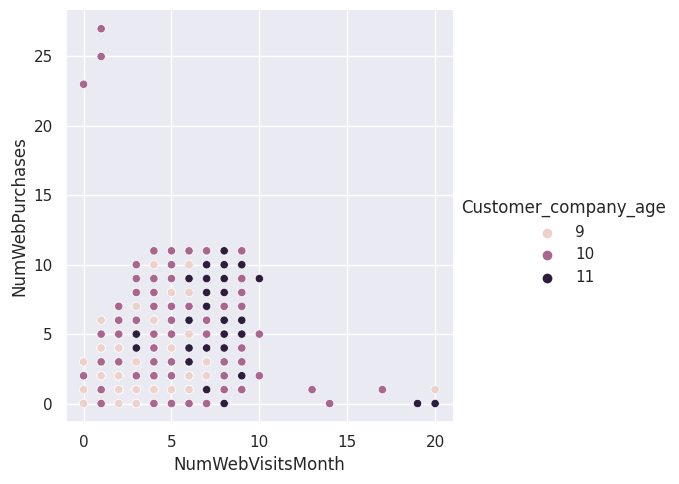

In [ ]:
# Here I used 3 dimensional scatter plot which vizualises 3 variables in one plot to see relationship between Number of website visits, Number of website purchases and Customer company age.

sns.relplot(data=Superstore_Data, x="NumWebVisitsMonth", y="NumWebPurchases", hue="Customer_company_age")

Most of the website visits happens between 3-9 times per month. Most of the number of website purchases is between 0-10.

Maximum number of purchases of 23, 25 and 27 times comes from the website visits of 0-1 times/month and that too from those whose company customer age is 10 years.

Maximum number of visits of 19-20 times are making 0-1 purchases and that their company customer age is 9 or 11 years.

#### Chart 10 - Product types and Number of Kids at home

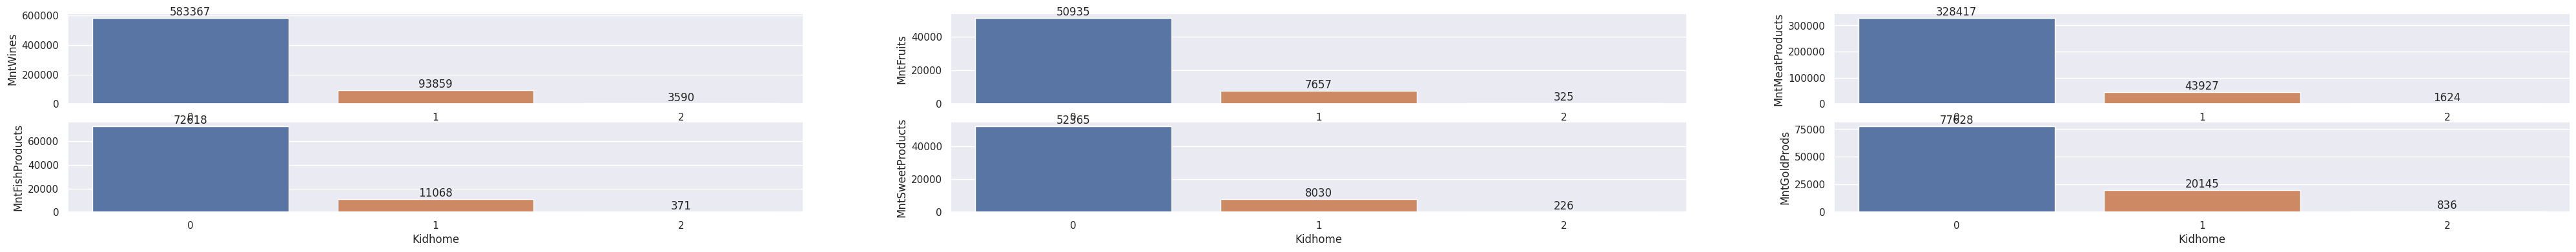

In [ ]:
plt.subplot(2, 3, 1)
sns.set(rc={'figure.figsize':(50,10)})
kid_wine = Superstore_Data.groupby(['Kidhome'], as_index=False)['MntWines'].sum().sort_values(by='MntWines', ascending=False)
ax = sns.barplot(x = 'Kidhome', y= 'MntWines' ,data = kid_wine)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 2)
sns.set(rc={'figure.figsize':(50,10)})
kid_fruit = Superstore_Data.groupby(['Kidhome'], as_index=False)['MntFruits'].sum().sort_values(by='MntFruits', ascending=False)
ax = sns.barplot(x = 'Kidhome', y= 'MntFruits' ,data = kid_fruit)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 3)
sns.set(rc={'figure.figsize':(50,10)})
kid_meat = Superstore_Data.groupby(['Kidhome'], as_index=False)['MntMeatProducts'].sum().sort_values(by='MntMeatProducts', ascending=False)
ax = sns.barplot(x = 'Kidhome', y= 'MntMeatProducts' ,data = kid_meat)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 4)
sns.set(rc={'figure.figsize':(50,10)})
kid_fish = Superstore_Data.groupby(['Kidhome'], as_index=False)['MntFishProducts'].sum().sort_values(by='MntFishProducts', ascending=False)
ax = sns.barplot(x = 'Kidhome', y= 'MntFishProducts' ,data = kid_fish)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 5)
sns.set(rc={'figure.figsize':(50,10)})
kid_sweet = Superstore_Data.groupby(['Kidhome'], as_index=False)['MntSweetProducts'].sum().sort_values(by='MntSweetProducts', ascending=False)
ax = sns.barplot(x = 'Kidhome', y= 'MntSweetProducts' ,data = kid_sweet)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 6)
sns.set(rc={'figure.figsize':(50,10)})
kid_gold = Superstore_Data.groupby(['Kidhome'], as_index=False)['MntGoldProds'].sum().sort_values(by='MntGoldProds', ascending=False)
ax = sns.barplot(x = 'Kidhome', y= 'MntGoldProds' ,data = kid_gold)
for bars in ax.containers:
    ax.bar_label(bars)

From above charts it can be seen that the buying pattern is same for all products with highest purchases is from 0 kid customers and second is from 1 kid customers and negligible is from 2 kids customers.

Highest purchases for all types of kidhome comes from Wines and least is from either Fruits and Sweets.


#### Chart 11 - Product types and Number of Teens at home

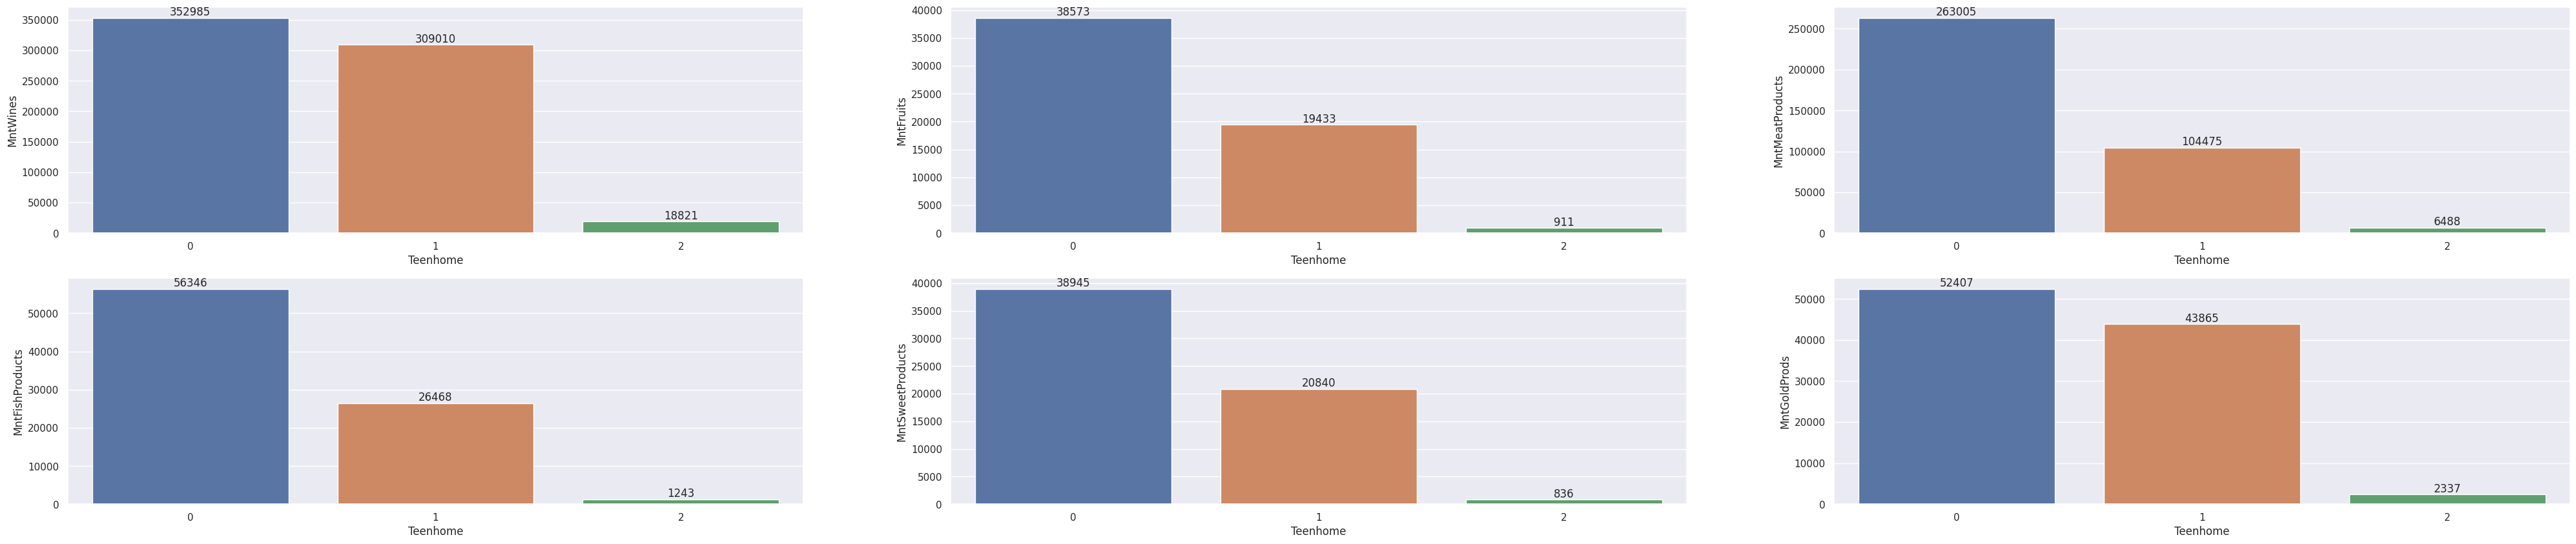

In [ ]:
plt.subplot(2, 3, 1)
sns.set(rc={'figure.figsize':(50,10)})
teen_wine = Superstore_Data.groupby(['Teenhome'], as_index=False)['MntWines'].sum().sort_values(by='MntWines', ascending=False)
ax = sns.barplot(x = 'Teenhome', y= 'MntWines' ,data = teen_wine)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 2)
sns.set(rc={'figure.figsize':(50,10)})
teen_fruit = Superstore_Data.groupby(['Teenhome'], as_index=False)['MntFruits'].sum().sort_values(by='MntFruits', ascending=False)
ax = sns.barplot(x = 'Teenhome', y= 'MntFruits' ,data = teen_fruit)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 3)
sns.set(rc={'figure.figsize':(50,10)})
teen_meat = Superstore_Data.groupby(['Teenhome'], as_index=False)['MntMeatProducts'].sum().sort_values(by='MntMeatProducts', ascending=False)
ax = sns.barplot(x = 'Teenhome', y= 'MntMeatProducts' ,data = teen_meat)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 4)
sns.set(rc={'figure.figsize':(50,10)})
teen_fish = Superstore_Data.groupby(['Teenhome'], as_index=False)['MntFishProducts'].sum().sort_values(by='MntFishProducts', ascending=False)
ax = sns.barplot(x = 'Teenhome', y= 'MntFishProducts' ,data = teen_fish)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 5)
sns.set(rc={'figure.figsize':(50,10)})
teen_sweet = Superstore_Data.groupby(['Teenhome'], as_index=False)['MntSweetProducts'].sum().sort_values(by='MntSweetProducts', ascending=False)
ax = sns.barplot(x = 'Teenhome', y= 'MntSweetProducts' ,data = teen_sweet)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 6)
sns.set(rc={'figure.figsize':(50,10)})
teen_gold = Superstore_Data.groupby(['Teenhome'], as_index=False)['MntGoldProds'].sum().sort_values(by='MntGoldProds', ascending=False)
ax = sns.barplot(x = 'Teenhome', y= 'MntGoldProds' ,data = teen_gold)
for bars in ax.containers:
    ax.bar_label(bars)

From above charts it can be seen that the buying pattern is same for all products with highest purchases is from 0 teen customers and second is from 1 kid customers and least is from 2 teen customers.

Highest purchases for all types of teenhome comes from Wines and least is from either Fruits and Sweets.

For Wines and Gold, customers who have 0 or 1 teens at home have nearly equal purchases.


### Task 5 - Conclusion and Recommendations

#### Customer Segmentation:


Demographic Segmentation:

*   a) Marital Status: -


>> Segment 1 (Married): Highest spenders across all products.

>> Segment 2 (Together/Single): Moderate spenders, similar spending patterns.

>> Segment 3 (Divorced/Widow): Lower spenders, with Widow spending the least.

*   b) Educational Status: -


>> Segment 1 (Graduated): Highest spenders, with a wide spending range.

>> Segment 2 (PhD/2nd Cycle/Basic): Lower spenders, particularly in Fruits and Sweets.

>> Segment 3 (Master): Lower spenders in Sweets.

*   c) Income: -


>> Segment 1 (60-80k): Highest spenders, across all purchase channels.

>> Segment 2 (40-60k, 80-100k): High spenders.

>> Segment 3 (0-20k): Low spenders, avoiding Catalogue purchases.








Behavioral Segmentation:

* a) Purchase Preferences: -


>> Segment 1 (Wines): Highest spending category.

>> Segment 2 (Meat): Second highest spending category.

>> Segment 3 (Fruits/Sweets): Least spending categories.



* b) Website Interaction: -

>> Segment 1 (9-10 years Customer company age): Monthly website visits (1-2 times).

>> Segment 2 (10-11 years Customer company age): High monthly website visits (8-9 times).


*   c) Children and Teens at Home: -

>> Segment 1 (0 kids/teens): Highest purchases, especially in Wines.

>> Segment 2 (1 kid/teen): Second highest purchases.

>> Segment 3 (2 kids/teens): Least purchases.

Relationship Analysis:


•	Positive relations:
>	Income and Wines.

>Meat and Catalogue purchases.

>Wine with Catalogue and Store purchases.


•	Negative relations:
> Number of website visits with various variables.

>Income and Catalogue purchases.

#### Actionable Recommendations:


1.	Targeted Marketing:

> •	Design targeted campaigns for high-spending segments (e.g., Married, Graduated, 60-80k income).

> •	Tailor promotions for categories with high potential (Wines, Meat).


2.	Website Optimization:


> •	Improve the online shopping experience to encourage more website visits, especially for high-spending segments.


> •	Implement personalized recommendations on the website based on past purchases.


3.	Customer Engagement:

> •	Engage with customers in the 9-11 years range, understanding their preferences and offering personalized incentives.


4.	Product Placement and Promotions:


> •	Highlight Wines and Meat in-store and online promotions.


> •	Adjust product placement and promotions based on marital status and education level.


5.	Customer Support and Complaint Resolution:


> •	Address customer complaints promptly to improve satisfaction and loyalty.


> •	Offer incentives to customers who complained in the last two years.


6.	Family Size Considerations:


> •	Tailor promotions and product recommendations based on the presence of kids and teens at home.


7.	Channel-Specific Strategies:


> •	Optimize marketing channels based on income segments (e.g., Catalogue for 40-60k, Store for 60-80k).


> •	Explore incentives for Deal purchases among 40-60k income customers.


8.	Data-Driven Decision Making:


> •	Regularly analyze relationships between variables for ongoing improvements.


> •	Invest in analytics tools for better insights into customer behavior.

By implementing these recommendations, the superstore can enhance customer satisfaction, increase sales, and improve overall business performance.